I got this data from maven analytics. It is a mock data and does not contain any missing or duplicate values. 

In [3]:
import pandas as pd

In [57]:
df = pd.read_csv("Bank_Churn.csv")
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 13)

In [5]:
df.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6367,15568742,Parkes,536,France,Female,41,9,0.00,1,1,0,121299.14,0
9416,15795370,Mazure,648,Germany,Male,37,6,131753.41,1,1,0,86894.67,0
3627,15609475,Ricci,604,Spain,Female,39,7,98544.11,1,1,1,52327.57,0
844,15806983,Moss,640,France,Male,44,3,137148.68,1,1,0,92381.01,0
1920,15723720,McKenzie,591,France,Female,31,7,0.00,2,0,1,48778.46,0


In [6]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df_cor = df.select_dtypes(include=['number'])
df_cor.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


As for EDA, I always used to manually plot everything and try to find the insights. But learning about Pandas Profiling trulty changed it. It is tiem saving and insightful. The below three lines of code provided me a report about my data. I spent hours trying to find insights from the data. It made manual EDA a easier.

In [ ]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Pandas y-data profiling generated a report of the data. And I found that

1. Most people had fair to good credit scores if I used Vantage Scoring. ( I am thinking of dividing it into categories)

2. Most people are from France and that is about 50% percent of the total given data. Around 25% from Germany and 24.8% from Spain.

3. In the given data 54.6% of people are males and 45.4% are females.

4. People have almost fairly stayed with the company for the tenure of 1 to 9 years but we also have people for less than 1 year and more than 9 years.

5. People from the age group of 30 - 50 have more frequency in the given data. ( I am thinking of dividing it in categories)

6. For some reason people have near to zero balance in their accounts that is about 36.2% of people.

7. Around 50% of people have 1 product of the bank while 45.9% of people have 2 products of the company.

8. About 70.5% have a credit card and 51.5% are active users of the bank.

9. People also have a balance of less than 500 rupees.

10. 20% of people have already churned. These are my insights from the given data. I am thinking of removing the CustomerID and surname column since it is not relevant to my problem statement of building a model and predicting if a customer will churn or not. After these interesting insights from individual columns. I found some correlations as well. Though the correlation is not that strong and lies only in the range of 0 to 0.3 I feel they were better from the correlation of 0.01 and so on.

I will now move on to study these insights better through data visualization. Like I assume people with fewer products associated with bank churn more but I would like to validate it with the data provided. I will also go for feature engineering next, I want to convert credit score and age-group into categories. 

Now I am making visualisation for the columns that have comparatively greater correlation. 
first I am divinding age and credit score into categories.

I am aware that we can do this through SKlearn library but here I want to customise the binning.

In [58]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60,100], labels=['18-25', '26-35', '36-45', '46-60', '60+'])
df['CreditScoreCat'] = pd.cut(df['CreditScore'], 
                                   bins=[300, 580, 669, 739, 799, 850], 
                                   labels=['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'])


In [59]:
new_df = df.drop(columns = ['CustomerId','Surname','CreditScore','Age'])
new_df 

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,CreditScoreCat
0,France,Female,2,0.00,1,1,1,101348.88,1,36-45,Fair
1,Spain,Female,1,83807.86,1,0,1,112542.58,0,36-45,Fair
2,France,Female,8,159660.80,3,1,0,113931.57,1,36-45,Poor
3,France,Female,1,0.00,2,0,0,93826.63,0,36-45,Good
4,Spain,Female,2,125510.82,1,1,1,79084.10,0,36-45,Exceptional
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,5,0.00,2,1,0,96270.64,0,36-45,Very Good
9996,France,Male,10,57369.61,1,1,1,101699.77,0,26-35,Poor
9997,France,Female,7,0.00,1,0,1,42085.58,1,36-45,Good
9998,Germany,Male,3,75075.31,2,1,0,92888.52,1,36-45,Very Good


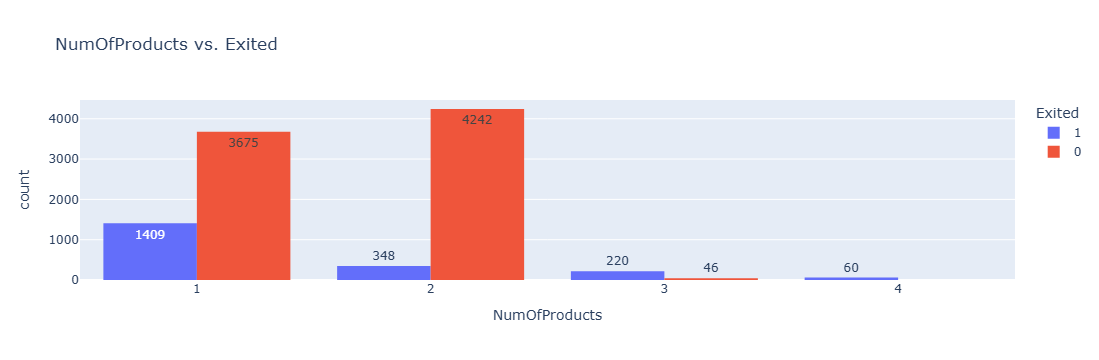

In [96]:
fig = px.histogram(
    new_df, 
    x="NumOfProducts", 
    color="Exited", 
    barmode="group", 
    title="NumOfProducts vs. Exited",
    text_auto=True
)
fig.show()


1. We can see that people with 1 product of the Bank churned more(14%). And It goes down as the no. of products with bank increases.Customers with fewer products are likely less engaged with the bank. 

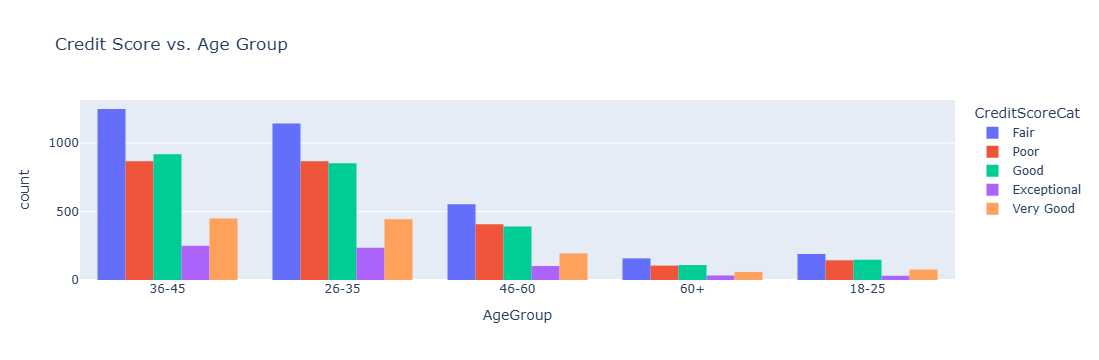

In [88]:
fig = px.histogram(
    new_df, 
    x="AgeGroup", 
    color="CreditScoreCat", 
    barmode="group",
    title="Credit Score vs. Age Group"
)
fig.show()


2. Most of the People lie in the Age Group of 36-45 with a fair to good credit score.

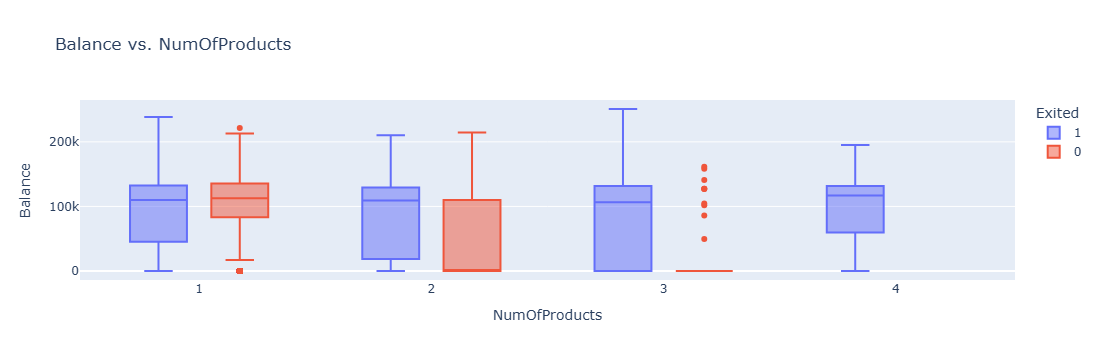

In [98]:
fig = px.box(
    new_df, 
    x="NumOfProducts", 
    y="Balance", 
    title="Balance vs. NumOfProducts",
    color="Exited"
)
fig.show()



3. People who exited with one product have a median balance of 110k and two products have a median balance of 109k, while three products have a median of 106K and four products have  a median balance of 116k.

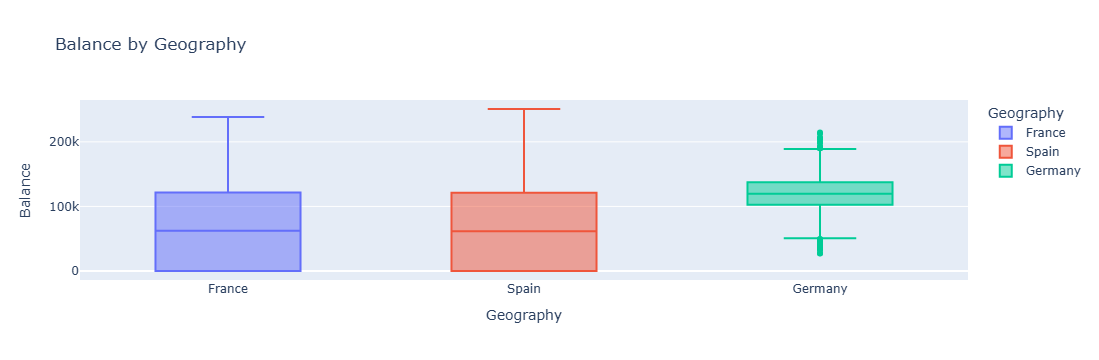

In [99]:
fig = px.box(
    new_df, 
    x="Geography", 
    y="Balance", 
    color="Geography", 
    title="Balance by Geography"
)
fig.show()


4. Balance at germany location have highet median(among all three location) 119k with highest balance 214k. While spain and france have almost similar median balance at 62k.

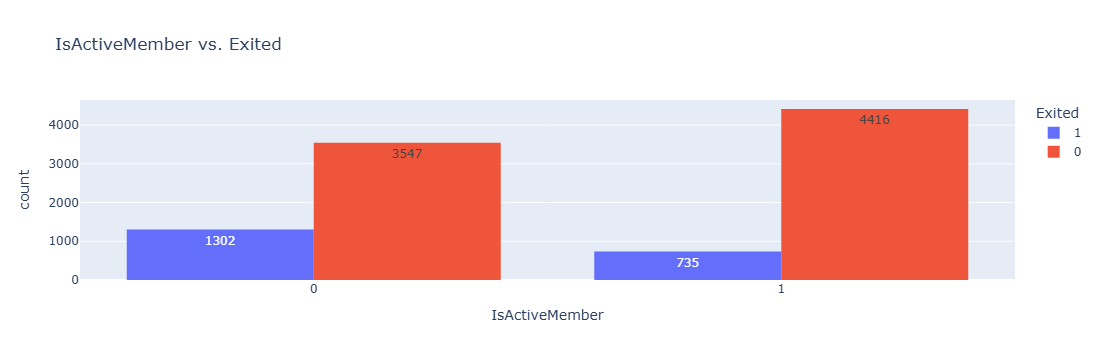

In [100]:
fig = px.histogram(
    new_df, 
    x="IsActiveMember", 
    color="Exited", 
    barmode="group",
    title="IsActiveMember vs. Exited",
    text_auto=True
)
fig.show()


5. People who are not active members churned more (13%) compared to the one who were active. 

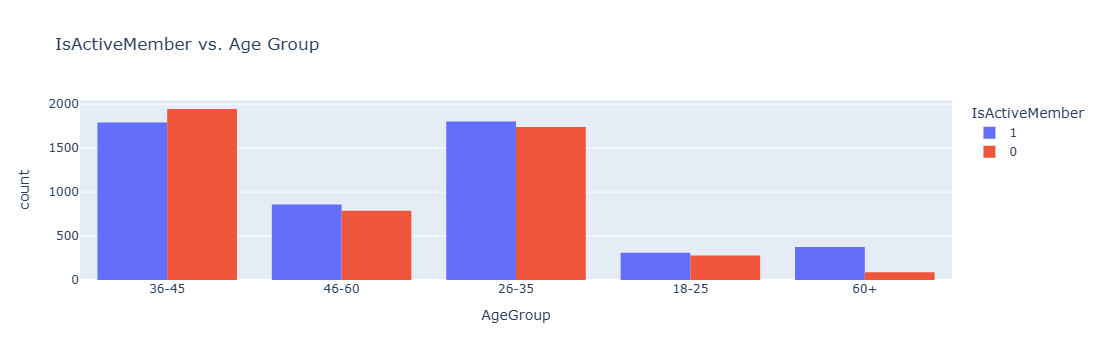

In [101]:
fig = px.histogram(
    new_df, 
    x="AgeGroup", 
    color="IsActiveMember", 
    barmode="group",
    title="IsActiveMember vs. Age Group"
)
fig.show()


6. People in the Age Group 26-45 are more active members of the bank comapred to others.

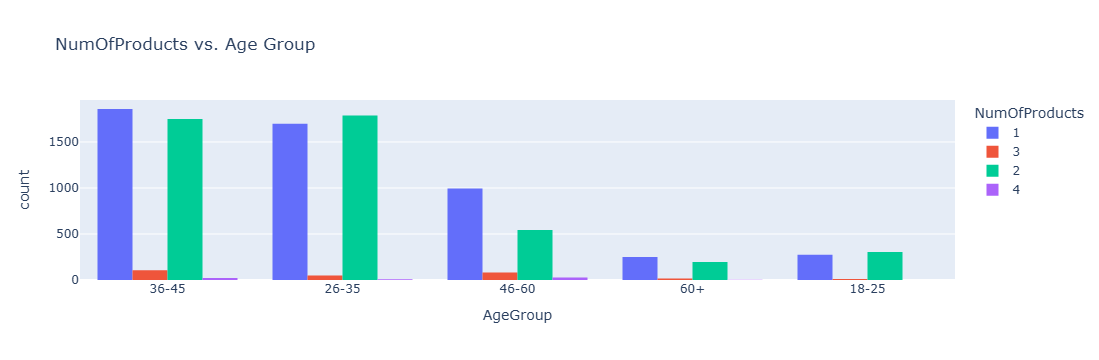

In [102]:
fig = px.histogram(
    new_df, 
    x="AgeGroup", 
    color="NumOfProducts", 
    barmode="group",
    title="NumOfProducts vs. Age Group"
)
fig.show()


7. Most people in the Age Group 26-35 have 2 products associated with the bank (17.87 %) while people in Age Group 36-45 have 1 products with the bank (18.58%).

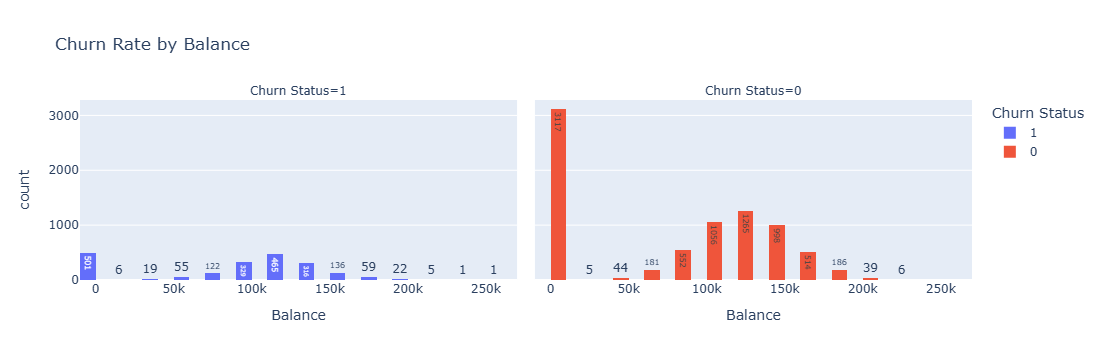

In [103]:
fig = px.histogram(
    new_df, 
    x="Balance", 
    color="Exited", 
    nbins=20, 
    barmode="group",
    title="Churn Rate by Balance",
    labels={"Exited": "Churn Status"},
    facet_col="Exited", 
    text_auto=True
)
fig.show()


8. People who had less than 10k balance in the account churned more (5%) than the people who had greater than 10k amount in the bank.

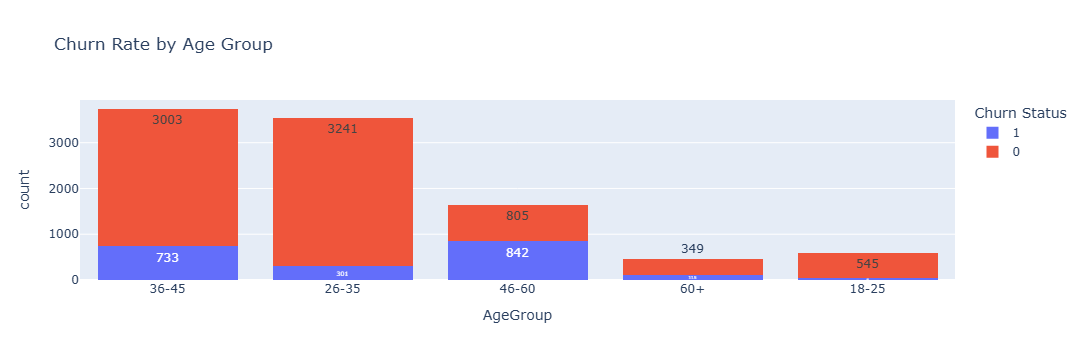

In [104]:
fig = px.histogram(
    new_df, 
    x="AgeGroup", 
    color="Exited", 
    barmode="stack", 
    title="Churn Rate by Age Group",
    labels={"Exited": "Churn Status", "Age Group": "Age Category"},
    text_auto=True
)
fig.show()


9. 8.42% people from age group 46-60 churned and 7.33% from age group 36-45. 

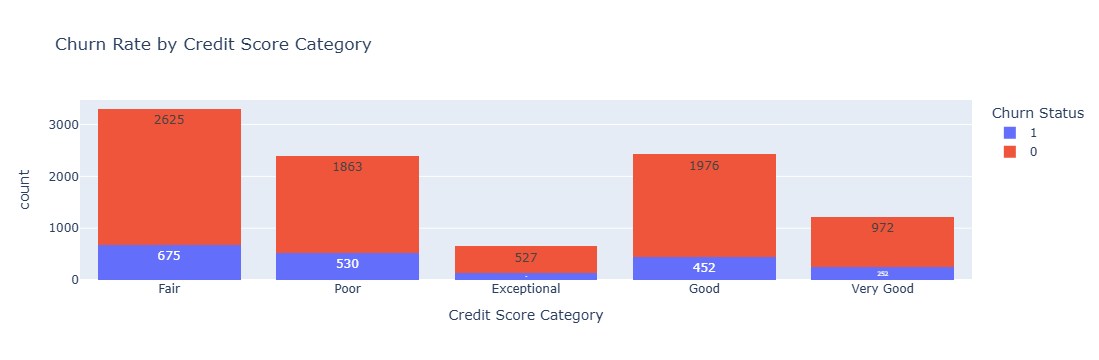

In [105]:
fig = px.histogram(
    new_df, 
    x="CreditScoreCat", 
    color="Exited", 
    barmode="stack", 
    title="Churn Rate by Credit Score Category",
    labels={"Exited": "Churn Status", "CreditScoreCat": "Credit Score Category"},
    text_auto=True
)
fig.show()


10. 6.75% from fair credit score category people churned more. And about 5.3% from poor category. 

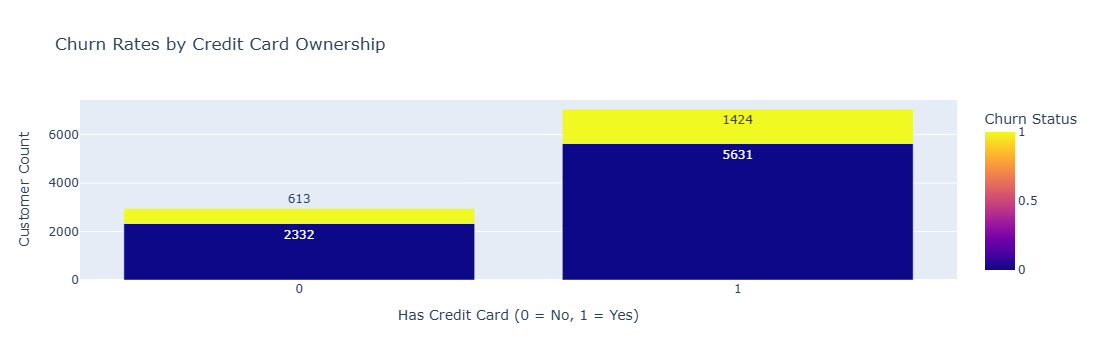

In [108]:
fig = px.bar(
    new_df.groupby(["HasCrCard", "Exited"]).size().reset_index(name="Count"),
    x="HasCrCard", 
    y="Count", 
    color="Exited", 
    barmode="group", 
    title="Churn Rates by Credit Card Ownership",
    labels={"HasCrCard": "Has Credit Card (0 = No, 1 = Yes)", "Exited": "Churn Status", "Count": "Customer Count"},
    text_auto=True
)
fig.show()



11. 14% of people who had credit card churned. While 6 % people who didn't had a credit card churned.

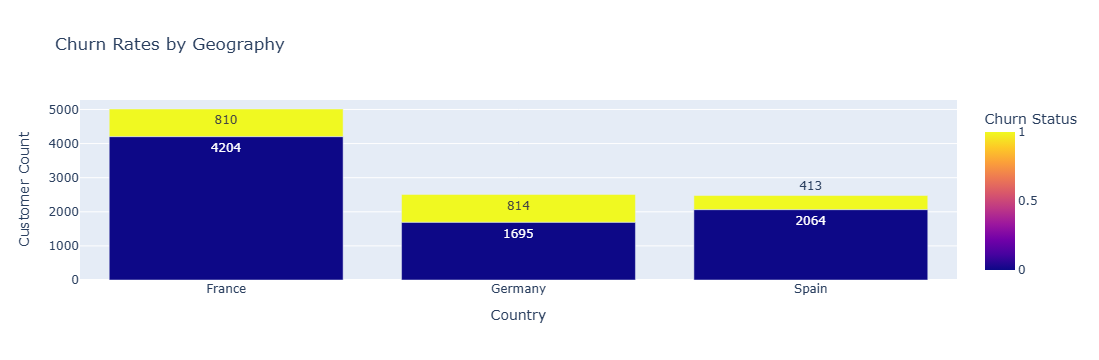

In [111]:
fig = px.bar(
    new_df.groupby(["Geography", "Exited"]).size().reset_index(name="Count"),
    x="Geography", 
    y="Count", 
    color="Exited", 
    barmode="group", 
    title="Churn Rates by Geography",
    labels={"Geography": "Country", "Exited": "Churn Status", "Count": "Customer Count"},
    text_auto=True
)
fig.show()


12. 8.14 % people churned from germany location while 8.10% churned from france location.

So sumarising the insights, we get that
1. Customers with only one product from the bank are much more likely to leave (14% churn rate), while those with more products tend to stay longer.  Offering bundled products could help retain single-product customers.
2. People with balances below 10k are more likely to churn. Interestingly, customers in Germany, despite having the highest median balance (119k), also show slightly higher churn rates compared to those in France and Spain. This suggests that balance alone isn’t enough to guarantee loyalty.
3. Inactive members are churning at higher rates (13%) compared to active ones. The most active customers are aged 26–45, this age group is the bank's most engaged demographic and a key focus for retention efforts.
4. While most customers fall in the 36–45 age group with fair-to-good credit scores, churn is particularly high among those aged 46–60 (8.42%) and those with fair credit scores (6.75%). 
5. Surprisingly, customers with credit cards are churning more (14%) than those without (6%). There is a possibility of dissatisfaction with the bank’s credit card benefits or stiff competition in the credit card market.
6. Tenure and Gender doesn’t seem to have a big impact on whether customers stay or leave(I didn't include the visualisation in the notebook), It suggests other factors—like product offerings, account balance, and engagement are more important to focus on.
   

In [ ]:
Now next I will move to feature enegeering. 